# Data Wrangling
Data wrangling, also known as data munging, is the process of `cleaning`, `transforming`, and `organizing` data in a way that makes it more suitable for analysis.\
It is a crucial step in the data science process as real-world data is often messy and inconsistent.
- Data Wrangling makes the data more `reliable` and `consistent`.

## Steps
1. Gathering The Data (Kia collect krna ha) - Liberaries
2. Tools to Clean and Analyze the Data (Kis ko clean krna Ha) - Liberaries
3. How to do, what to do (Kis ko kya krna ha)

In [710]:
# Liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Gather Data of Titanic

In [711]:
df = sns.load_dataset('titanic')

In [712]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [713]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [714]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [716]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [717]:
df['age'].value_counts()

age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [718]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# Removing Column

In [719]:
df.drop(columns='deck', inplace=True)

## Filling in Column

In [720]:
df["age"] = df["age"].fillna(df["age"].mean())

In [721]:
df.isnull().sum() / len(df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

### Categorical Datatype k lia `Mode()`

In [722]:
# replace with 1st mode--> catogorical data
df['embarked'] = df['embarked'].fillna(value=df['embarked'].mode()[0])

In [723]:
# replace with 1st mode--> catogorical data
df['embark_town'] = df['embark_town'].fillna(value=df['embark_town'].mode()[0])

In [724]:
df.isnull().sum() / len(df) * 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Outliers Removal

## 1. Visualization Wala Method

<Axes: xlabel='sex', ylabel='age'>

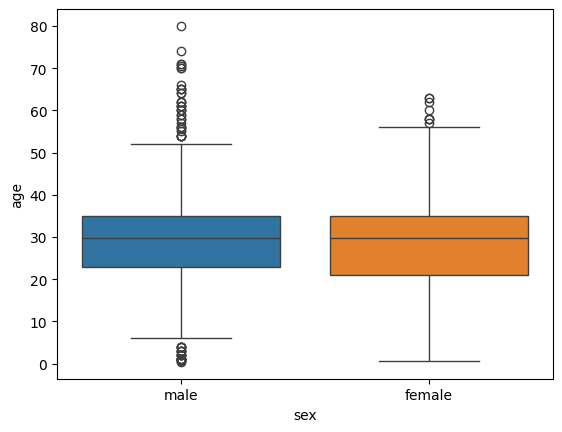

In [725]:
import seaborn as sns
sns.boxplot(data=df , x='sex' , y='age' , hue='sex')

In [726]:
df.shape

(891, 14)

## 2. IQR Method

In [727]:
# IQR Method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]



Now check again Outlier is remove or not

<Axes: xlabel='age', ylabel='Count'>

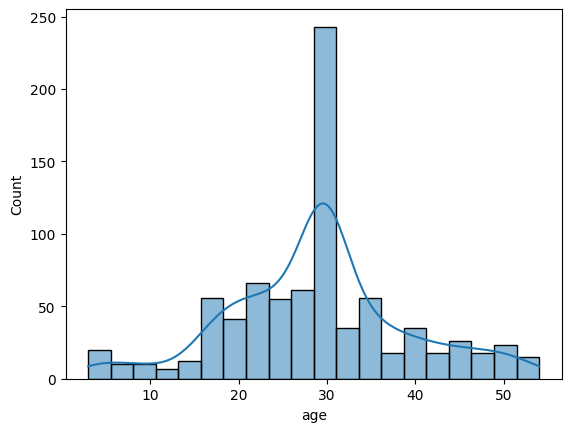

In [728]:
sns.histplot(df['age'] , kde=1)

<Axes: xlabel='sex', ylabel='age'>

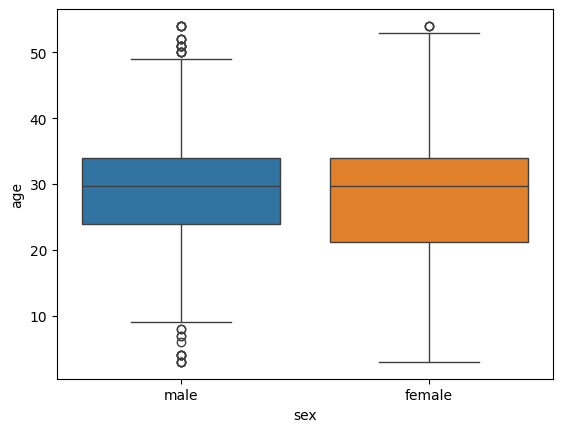

In [729]:
sns.boxplot(data=df , x='sex' , y='age' , hue='sex')

In [730]:
df.shape

(825, 14)

In [731]:
# IQR Method For Fare
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]



In [732]:
df.shape

(718, 14)

<Axes: xlabel='fare', ylabel='Count'>

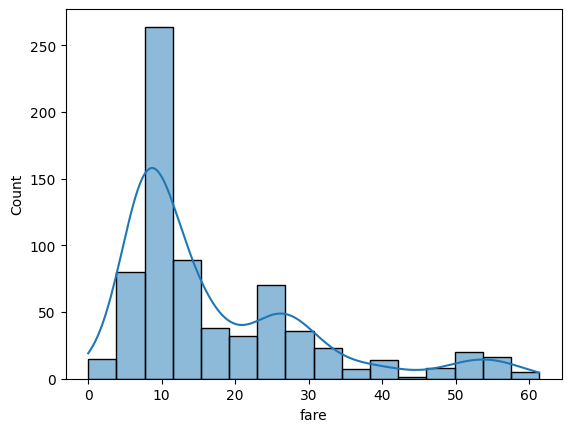

In [733]:
sns.histplot(df['fare'] , kde=1)

In [734]:
# IQR Method For Fare
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]



In [735]:
df.shape

(676, 14)

<Axes: xlabel='age', ylabel='Count'>

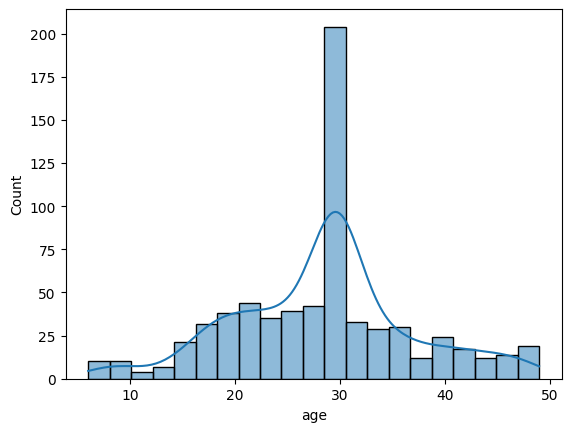

In [736]:
sns.histplot(df['age'] , kde=1)

## 2. Z-Score

### Explanation:
1. **Z-score Formula**: 
   - z = \frac{x - mu}/{sigma}
   - x: Data point
   - mu: Mean of the data
   - sigma: Standard deviation of the data
   
2. **Threshold**: 
   - A threshold of `3` is commonly used to identify outliers.
   - Data points with \( |z| > 3 \) are considered outliers.

3. **`.all(axis=1)` Issue**:
   - It is used when dealing with multiple columns to check the condition across rows.
   - For a single column, this is unnecessary.

<Axes: xlabel='age', ylabel='Count'>

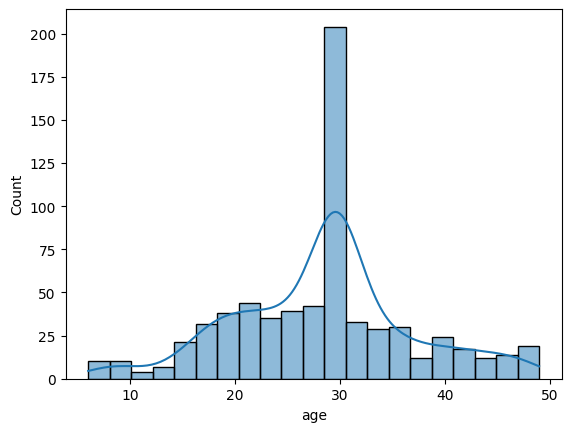

In [737]:
# Importing required libraries
from scipy import stats
import numpy as np

# Calculate the Z-score for the 'age' column
zscore = np.abs(stats.zscore(df['age']))

# Define a threshold for outliers
threshold = 3

# Filter the dataframe to keep only rows where Z-score is below the threshold
df = df[zscore < threshold]
sns.histplot(df['age'] , kde=1)

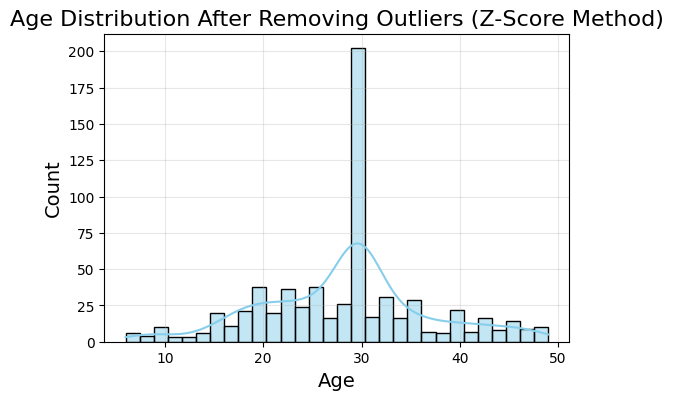

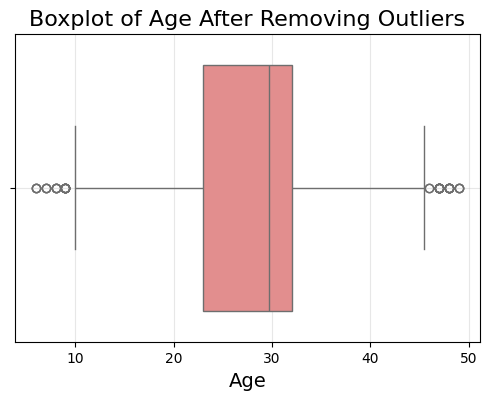

In [738]:

# Histogram with density plot
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution After Removing Outliers (Z-Score Method)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Boxplot to visualize remaining data
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['age'], color='lightcoral')
plt.title('Boxplot of Age After Removing Outliers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


# Finding Duplicates

In [739]:
df.duplicated().sum()

np.int64(102)

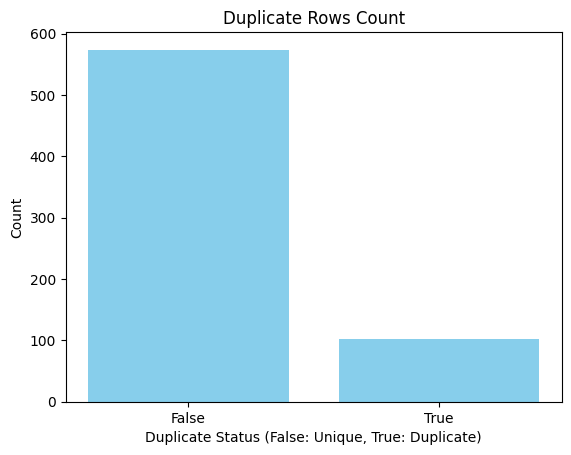

In [740]:
import matplotlib.pyplot as plt

# Get duplicate status (True or False)
df_duplicate = df.duplicated()

# Count the occurrences of True and False
df_duplicate_count = df_duplicate.value_counts()

# Plot the bar chart
plt.bar(df_duplicate_count.index.astype(str), df_duplicate_count.values, color='skyblue')
plt.xlabel('Duplicate Status (False: Unique, True: Duplicate)')
plt.ylabel('Count')
plt.title('Duplicate Rows Count')
plt.show()


In [741]:
df.drop_duplicates(inplace=True)

In [742]:
df.shape

(574, 14)

# 5. Transforming the Data
## 1. Data Normalzation
### 1.1. Methods
  1. `Min-Max Scaling` : This method scales the data to a common range, usually between [0 , 1].
   - **Formula**: `x' = (x - min) / (max - min)`
   - **Use**: Use when you know the range of your data and want to prevent features with large ranges from dominating the model.
  2. `Z-Score Normalization` : This method scales the data to have a mean of 0 and a standard deviation of 1.
   - **Formula**: `x' = (x - mean) / std`
   - **Use**: Use when you know Data is normally Distributed
  3. `Decimal Scaling` : This method scales the data to a specific decimal place.
     - **Formula**: `x' = x * 10^(-p)` where p is the smallest decimal place you want to round to.
     - **Use**: Use when you want to reduce the number of decimal places in your data.
  4. `Log Transformation` : This method transforms the skewed data by taking the logarithm of the values.
   - **Formula**: `x' = log(x)`
   - **Use**: Use when you have skewed data and want to reduce the effect of outliers.
  5. `MaxAbs Scaler` : This method scales the data to a common range, usually between [-1 , 1].
   - **Formula**: `x' = x / max(abs(x))`
   - **Use**: Useful for sparse Datasets
  6. `Robust Scaling` : This method scales the data to a common range, usually between [-1 , 1], using IQR to reduce the impact of out;iers.
   - **Formula**: `x' = (x - Median) / (Q3 - Q1)`
   - **Use**: Use when you have outliers in your data.
  7. `L2 Normalization` : This method scales the data to a common range usually between [0 , 1], so that the sum of squares of the data (elements) is equal to 1.
   -  **Formula**: `x' = x / sqrt(sum(x^2))`
   -  **Use**: Useful for text data and machine learning models like SVM .
  8. `Standard Scaler` : This method scales the data to have a mean of 0 and a standard deviation of 1.
   - **Formula**: `x' = (x - mean) / std`
   - **Use**: Use when you know Data is normally Distributed

#### Min-Max Scaler

In [743]:
# Min-Max Scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Data le Ana Ha Yaha
df

# slect columns to normalize
# scale sirf numeric values ka hota haka hota ha na k catagorical data ka
cols_to_normalize = ['age','fare']
# create a scaler object/tool/function
scaler = MinMaxScaler()

# Ab is scale ma hum ny data fit and transform krna ha
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372093,1,0,0.118512,S,Third,man,True,Southampton,no,False
2,1,3,female,0.465116,0,0,0.129546,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.674419,1,0,0.868002,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.674419,0,0,0.131590,S,Third,man,True,Southampton,no,True
5,0,3,male,0.551142,0,0,0.138264,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.767442,0,5,0.476093,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.302326,0,0,0.490396,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.551142,1,2,0.383327,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.465116,0,0,0.490396,C,First,man,True,Cherbourg,yes,True


In [744]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,0.348432,2.487805,0.518383,0.423345,0.339721,0.291817
std,0.476889,0.737212,0.209690,0.848083,0.830015,0.219007
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372093,0.000000,0.000000,0.129069
50%,0.000000,3.000000,0.551142,0.000000,0.000000,0.212505
75%,1.000000,3.000000,0.627907,1.000000,0.000000,0.425010
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


#### StandardScaler

In [745]:
# StandardScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Data le Ana Ha Yaha
df

# slect columns to normalize
# scale sirf numeric values ka hota haka hota ha na k catagorical data ka
cols_to_normalize = ['age','fare']
# create a scaler object/tool/function
scaler = StandardScaler()

# Ab is scale ma hum ny data fit and transform krna ha
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.698256,1,0,-0.792010,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.254246,0,0,-0.741584,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.744778,1,0,2.633197,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.744778,0,0,-0.732246,S,Third,man,True,Southampton,no,True
5,0,3,male,0.156366,0,0,-0.701744,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,1.188788,0,5,0.842154,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-1.031264,0,0,0.907520,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.156366,1,2,0.418205,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.254246,0,0,0.907520,C,First,man,True,Cherbourg,yes,True


In [746]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,574.000000,574.000000,5.740000e+02,574.000000,574.000000,5.740000e+02
mean,0.348432,2.487805,-7.736746e-17,0.423345,0.339721,1.052197e-16
std,0.476889,0.737212,1.000872e+00,0.848083,0.830015,1.000872e+00
min,0.000000,1.000000,-2.474297e+00,0.000000,0.000000,-1.333618e+00
25%,0.000000,2.000000,-6.982560e-01,0.000000,0.000000,-7.437656e-01
50%,0.000000,3.000000,1.563660e-01,0.000000,0.000000,-3.624583e-01
75%,1.000000,3.000000,5.227725e-01,1.000000,0.000000,6.087016e-01
max,1.000000,3.000000,2.298814e+00,5.000000,6.000000,3.236436e+00


#### Log Transformation

In [747]:
kashti = sns.load_dataset('titanic')

In [748]:
kashti.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [749]:
import numpy as np

# Fill missing values with the median
kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

# Apply log transformation safely using log1p
kashti['age'] = np.log1p(kashti['age'])
kashti['fare'] = np.log1p(kashti['fare'])

# Check first 5 rows
kashti.head(5)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.135494,1,0,2.110213,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.663562,1,0,4.280593,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.295837,0,0,2.188856,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.583519,1,0,3.990834,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.583519,0,0,2.202765,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='fare'>

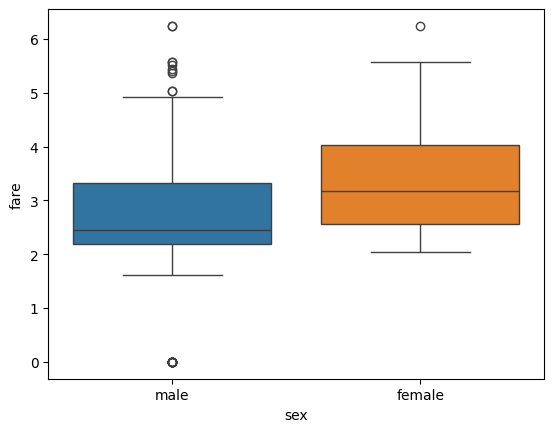

In [750]:
sns.boxplot(kashti,x='sex',y='fare',hue='sex')

# Organising the Data

In [751]:
df['family_size'] = df['sibsp'] + df['parch']

c:\Users\abuba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

c:\Users\abuba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\abuba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


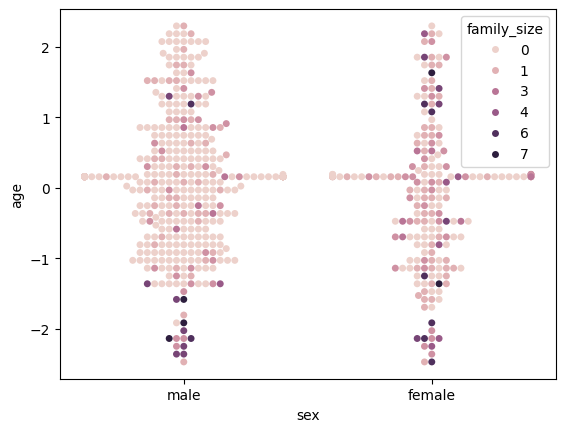

In [752]:
sns.swarmplot(data=df , x='sex' , y='age' , hue='family_size')

In [753]:
df = df.rename(columns={
    'survived': 'survival'
})

# Pivot Table

In [754]:
table = pd.pivot_table(df, values='fare', index='who', columns='survival', aggfunc=np.mean)
table

C:\Users\abuba\AppData\Local\Temp\ipykernel_14328\3813372060.py:1: FutureWarning: The provided callable <function mean at 0x0000020BEBE0A7A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df, values='fare', index='who', columns='survival', aggfunc=np.mean)


survival,0,1
who,,
child,0.809722,0.061574
man,-0.233146,0.298948
woman,-0.120733,0.321682


<Axes: xlabel='fare', ylabel='age'>

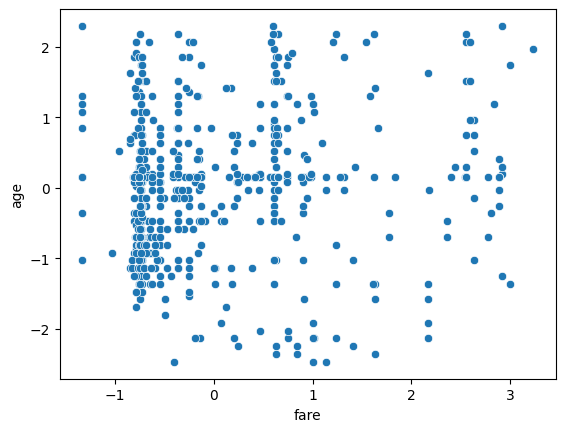

In [755]:
# relation
sns.scatterplot(df,x='fare',y='age')

In [756]:
# Saving the Wrangled data
df.to_csv('preprocessed_data.csv')

In [757]:
df.shape

(574, 15)

In [758]:
df.to_excel('preprocessing.xlsx')